In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
excelfile = pd.ExcelFile("Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx")

In [7]:
exist = excelfile.parse("Existing employees")
left = excelfile.parse("Employees who have left")


In [9]:
exist.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [12]:
left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


Data Preprocessing step: we prepare and analyze the data.

In [13]:
left['promotion_last_5years'] = left['promotion_last_5years'].apply(lambda x: "Yes" if x==1 else "No")
exist['promotion_last_5years'] = exist['promotion_last_5years'].apply(lambda x: "Yes" if x==1 else "No")
left['Work_accident'] = left['Work_accident'].apply(lambda x: "Yes" if x==1 else "No")
exist['Work_accident'] = exist['Work_accident'].apply(lambda x: "Yes" if x==1 else "No")

Univariant Analysis of Existing exployees and those who have left:

Salary

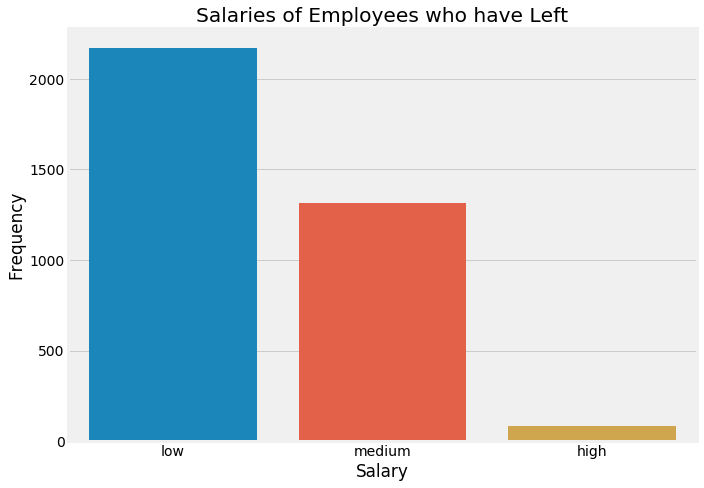

In [29]:
plt.figure(figsize=(10,7))
plt.style.use('fivethirtyeight')
sns.countplot(left['salary'])
plt.title("Salaries of Employees who have Left")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.tight_layout()

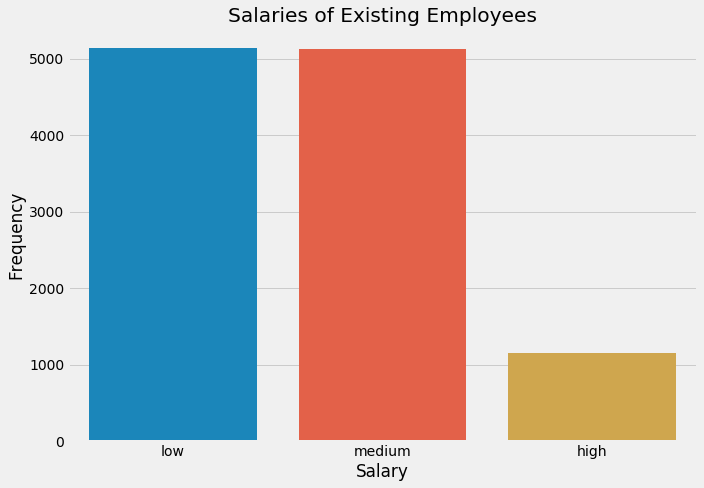

In [30]:
plt.figure(figsize=(10,7))
plt.style.use('fivethirtyeight')
sns.countplot(exist['salary'])
plt.title("Salaries of Existing Employees")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.tight_layout()

Departments

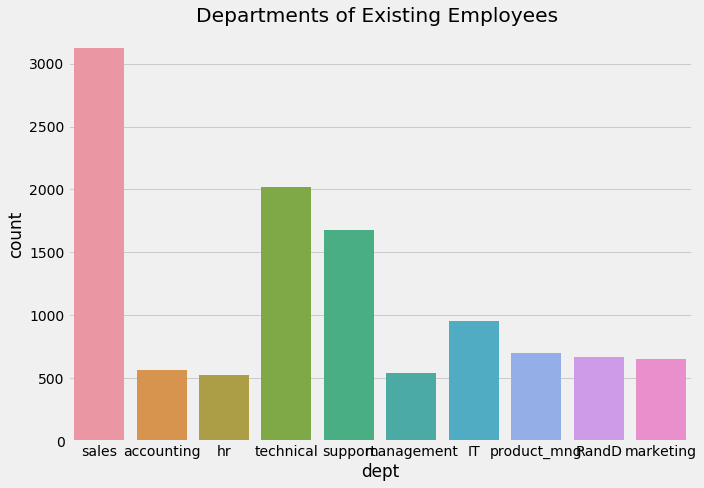

In [31]:
plt.figure(figsize=(10,7))
sns.countplot(exist['dept'])
plt.title("Departments of Existing Employees ")
plt.tight_layout()

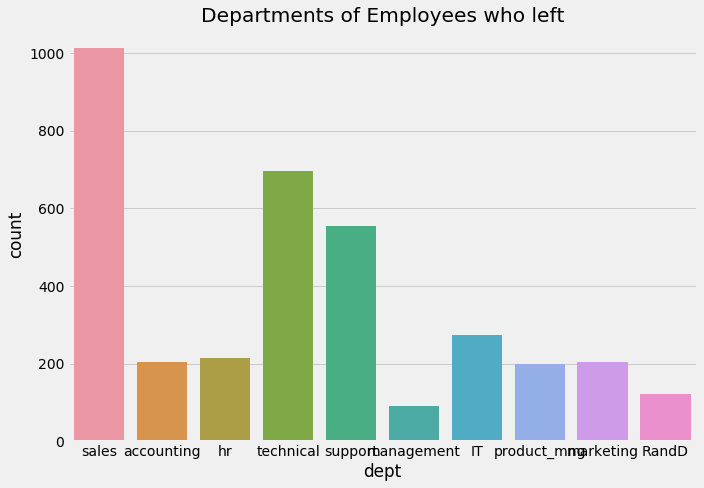

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(left['dept'])
plt.title("Departments of Employees who left")
plt.tight_layout()

Satisfaction level

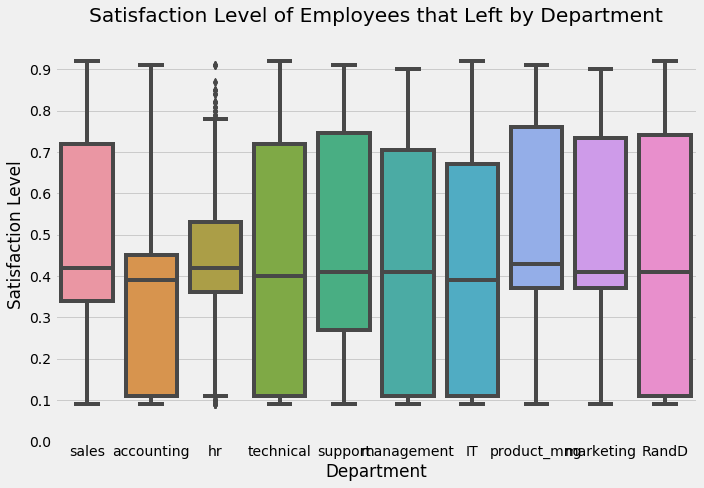

In [33]:
plt.figure(figsize=(10,7))
sns.boxplot(x='dept',y='satisfaction_level',data=left)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.1))
plt.tight_layout()
plt.title("Satisfaction Level of Employees that Left by Department")
plt.xlabel('Department')
plt.ylabel("Satisfaction Level")
plt.tight_layout()

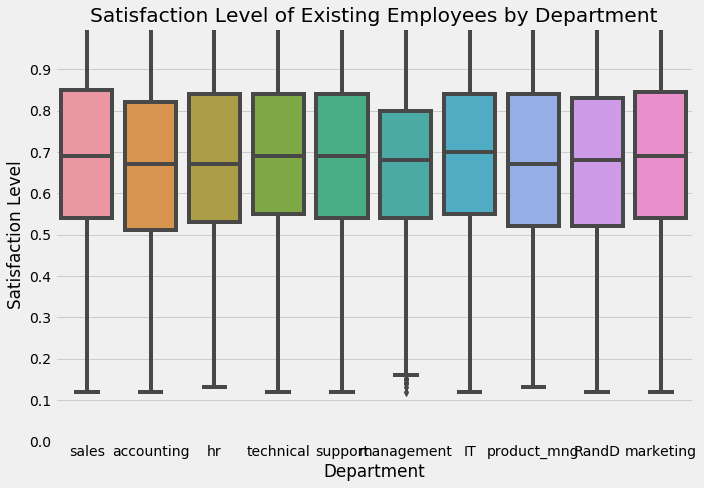

In [34]:
plt.figure(figsize=(10,7))
sns.boxplot(x='dept',y='satisfaction_level',data=exist)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.1))
plt.tight_layout()
plt.title("Satisfaction Level of Existing Employees by Department")
plt.xlabel('Department')
plt.ylabel("Satisfaction Level")
plt.tight_layout()

We can infer from these box plots that:
    1. The median Satisfaction level of employees that left is between 40-50%
    
        and
        
    2. The median Satisfaction level of employees existing is between 65-70%
    
we then carry out further analysis on the satisfaction level.

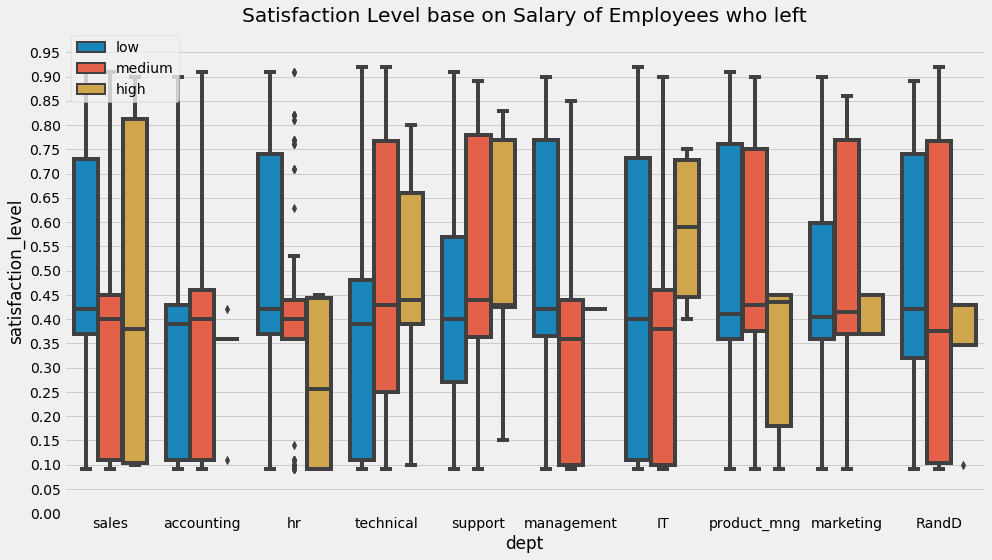

In [35]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='satisfaction_level',hue='salary',data=left)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.title("Satisfaction Level base on Salary of Employees who left")
plt.tight_layout()
plt.legend(loc=2)

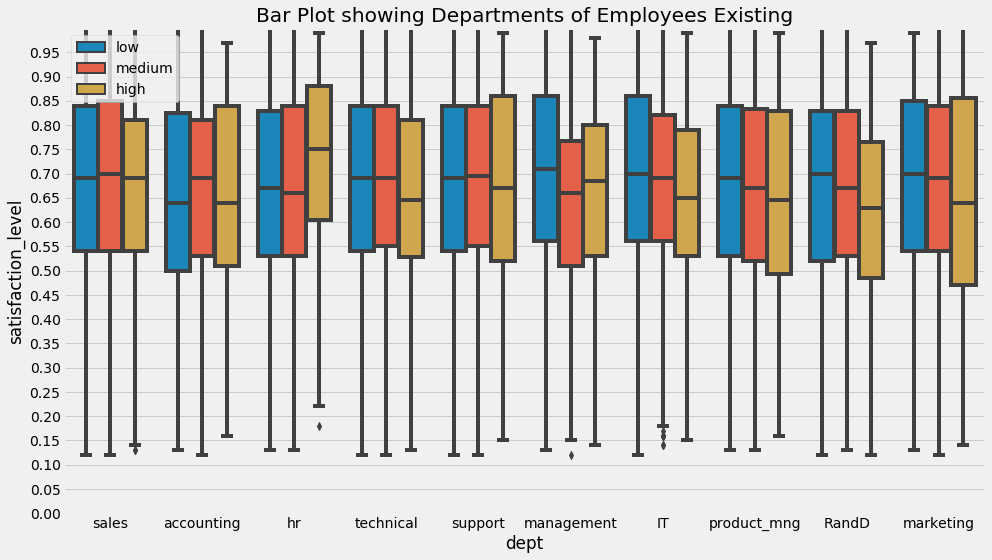

In [36]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='satisfaction_level',hue='salary',data=exist)
plt.title("Bar Plot showing Departments of Employees Existing")
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

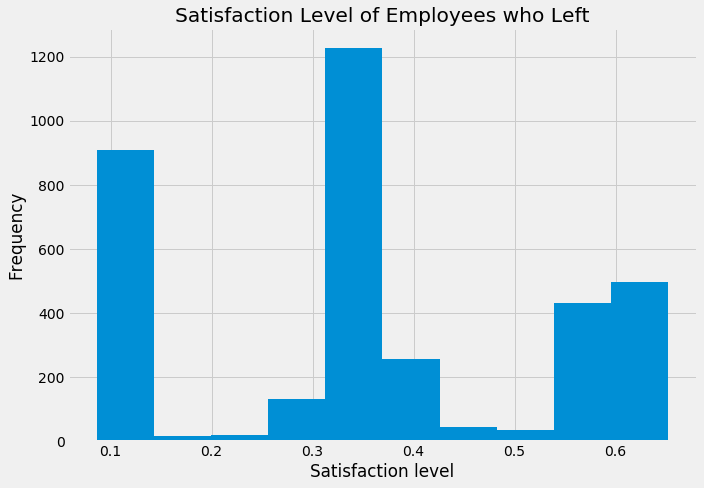

In [32]:
plt.figure(figsize=(10,7))
(np.log(left['satisfaction_level'] + 1)).plot.hist()
plt.title("Satisfaction Level of Employees who Left")
plt.xlabel('Satisfaction level')
plt.ylabel("Frequency")
plt.tight_layout()

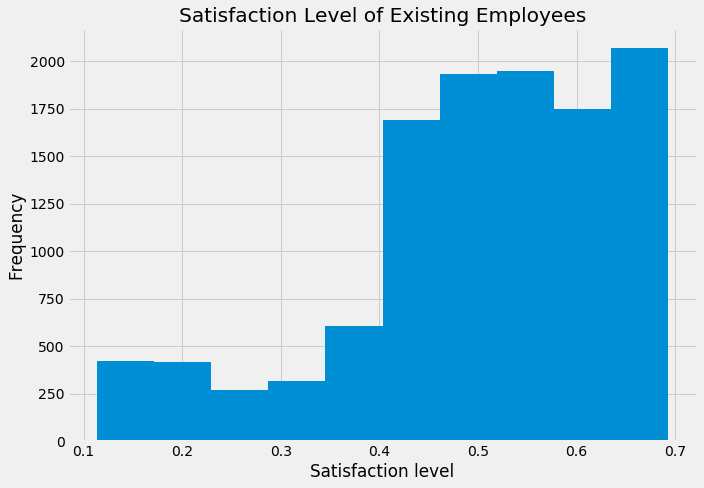

In [37]:
plt.figure(figsize=(10,7))
(np.log(exist['satisfaction_level'] + 1)).plot.hist()
plt.title("Satisfaction Level of Existing Employees")
plt.xlabel('Satisfaction level')
plt.ylabel("Frequency")
plt.tight_layout()

The satisfaction level of employees who left is relatively low. 
 

In [38]:
(len(left[left['satisfaction_level']<0.45])/len(left)) * 100

64.57574908989079

THe output shows the 65% of employees who left had less than 45% satisfaction level.
Promotion seemed to be a determining factor which leads to finding out the amount of employees
who left that had less than 45%

In [39]:
(left[left['satisfaction_level']<0.45]['promotion_last_5years'].value_counts(normalize=True))*100

No    100.0
Name: promotion_last_5years, dtype: float64

From the result displayed, about 100% of employees that left who had less than 45% satisfaction level 
were not promoted in the last 5 years which can described as a factor why they left.
We then check for salary range

In [40]:
(left[left['satisfaction_level']<0.45]['salary'].value_counts(normalize=True))*100

low       60.754553
medium    37.120555
high       2.124892
Name: salary, dtype: float64

It shows that 61% of the employees were low income earners

In [42]:
exist['satisfaction_level'].mean()*100


66.6809590479516

We see from the output that the average satisfaction level of the existing employees is around 70%

In [44]:
print (str((len(exist[exist['satisfaction_level']<0.45])/len(exist)) * 100) + '%' + ' of employees that exist have satisfaction level less than 45%')

exist[exist['satisfaction_level']<0.45]['promotion_last_5years'].value_counts(normalize=True)*100

13.816940847042353% of employees that exist have satisfaction level less than 45%


No    100.0
Name: promotion_last_5years, dtype: float64

13% of existing employees had satisfacttion level less than 45%

In [47]:
left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,No,No,sales,low
1,2,0.80,0.86,5,262,6,No,No,sales,medium
2,3,0.11,0.88,7,272,4,No,No,sales,medium
3,4,0.72,0.87,5,223,5,No,No,sales,low
4,5,0.37,0.52,2,159,3,No,No,sales,low


We then carry out the last evaluation of existing employees and those who left

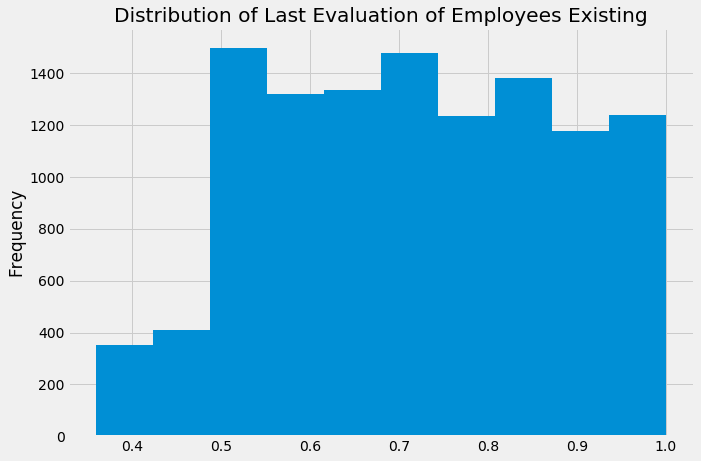

In [49]:
plt.figure(figsize=(10,7))
plt.title("Distribution of Last Evaluation of Employees Existing")
exist['last_evaluation'].plot.hist()

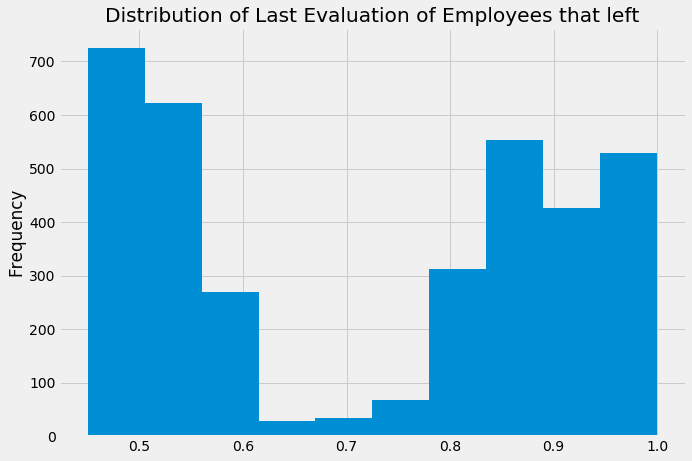

In [51]:
plt.figure(figsize=(10,7))
plt.title("Distribution of Last Evaluation of Employees that left")
left['last_evaluation'].plot.hist()

In [53]:
#we determine the mean and median of the existing and ex employees
left['last_evaluation'].median(), left['last_evaluation'].mean()

(0.79, 0.7181125735088183)

In [55]:
exist['last_evaluation'].median(),exist['last_evaluation'].mean()

(0.71, 0.7154733986699274)

we further analyze to gather more insights


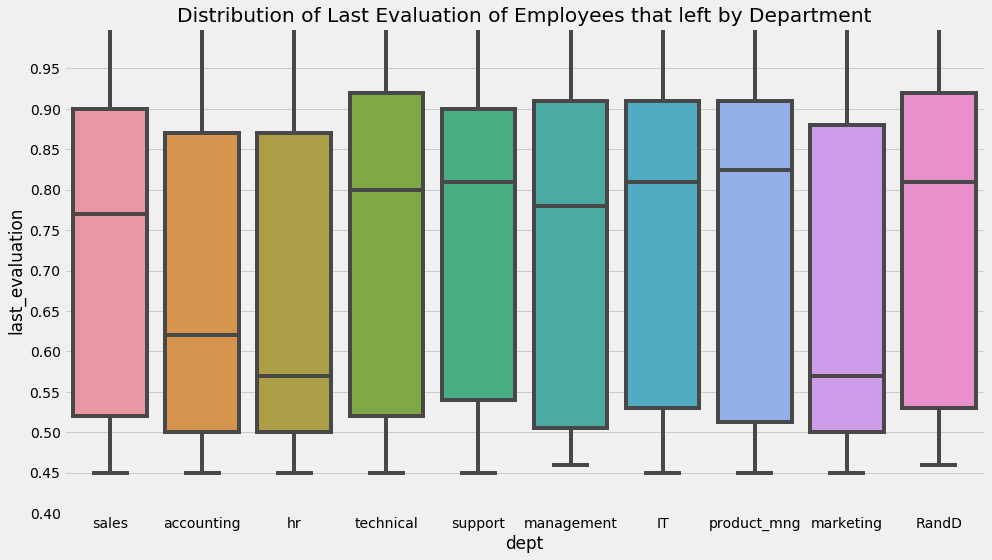

In [56]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='last_evaluation',data=left)
plt.title("Distribution of Last Evaluation of Employees that left by Department")
plt.ylim([0.4,1])
plt.yticks(np.arange(0.4, 1, step=0.05))
plt.tight_layout()

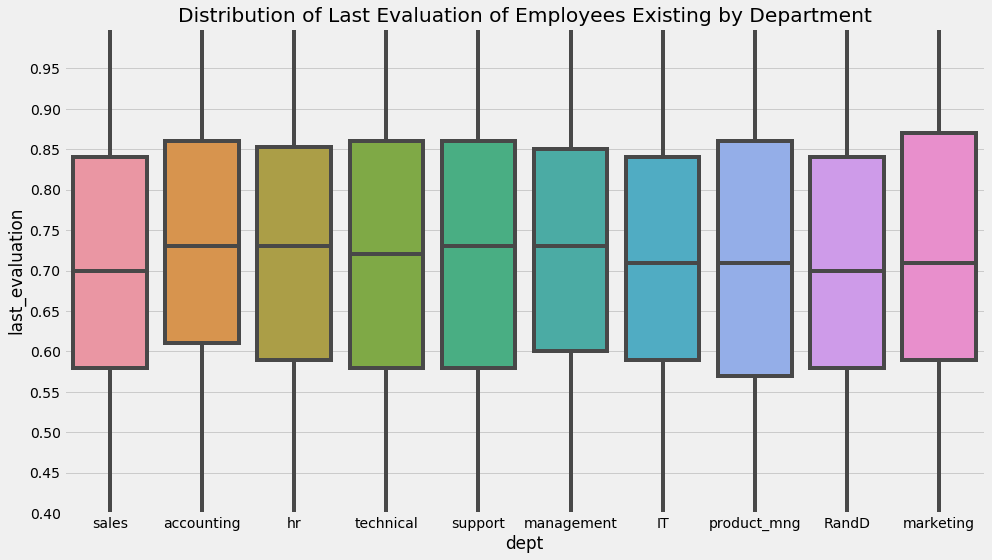

In [57]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='last_evaluation',data=exist)
plt.title("Distribution of Last Evaluation of Employees Existing by Department")
plt.ylim([0.4,1])
plt.yticks(np.arange(0.4, 1, step=0.05))
plt.tight_layout()

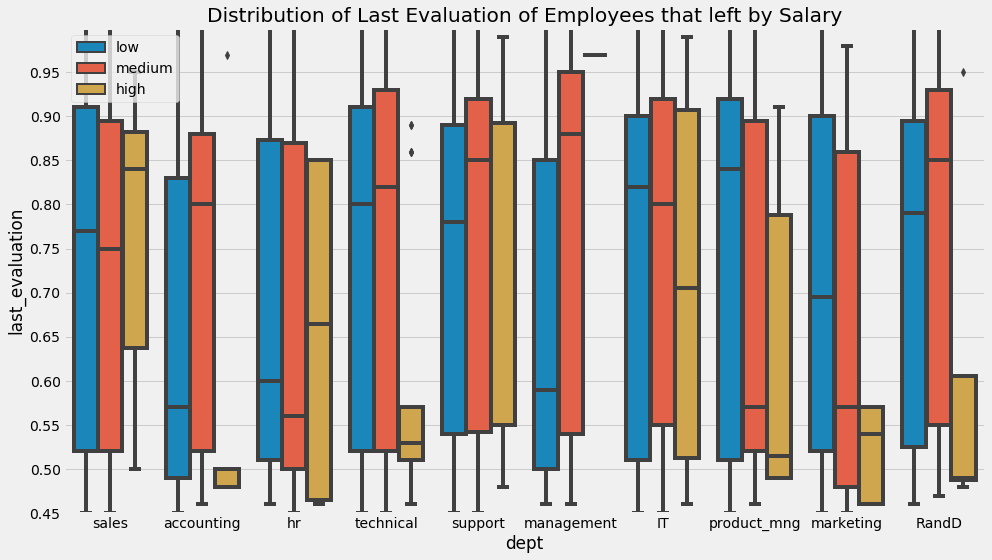

In [58]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='last_evaluation',hue='salary',data=left)
plt.title("Distribution of Last Evaluation of Employees that left by Salary")
plt.ylim([0.45,1])
plt.yticks(np.arange(0.45, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

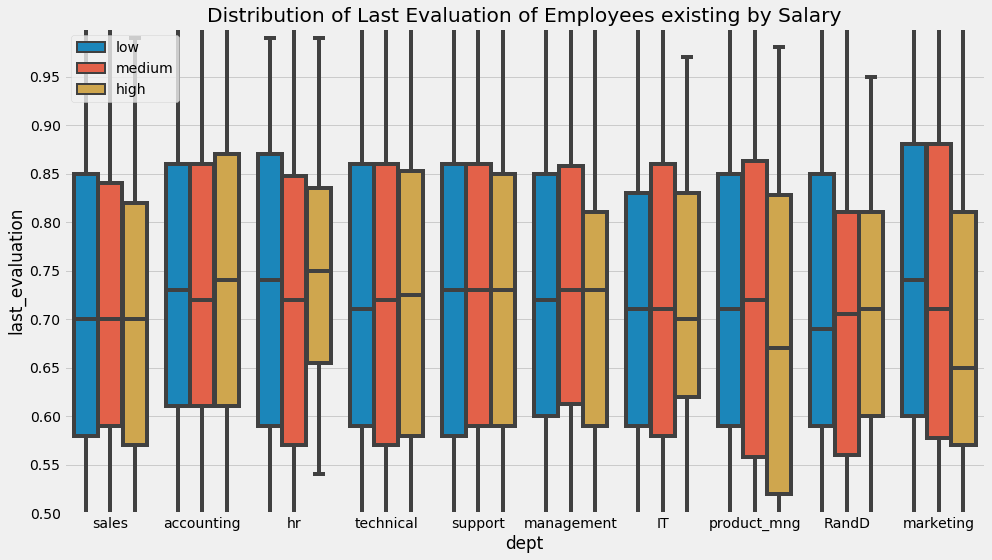

In [60]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='last_evaluation',hue='salary',data=exist)
plt.title("Distribution of Last Evaluation of Employees existing by Salary")
plt.ylim([0.5,1])
plt.yticks(np.arange(0.5, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

We then carry out Bi/Multivariant analysis

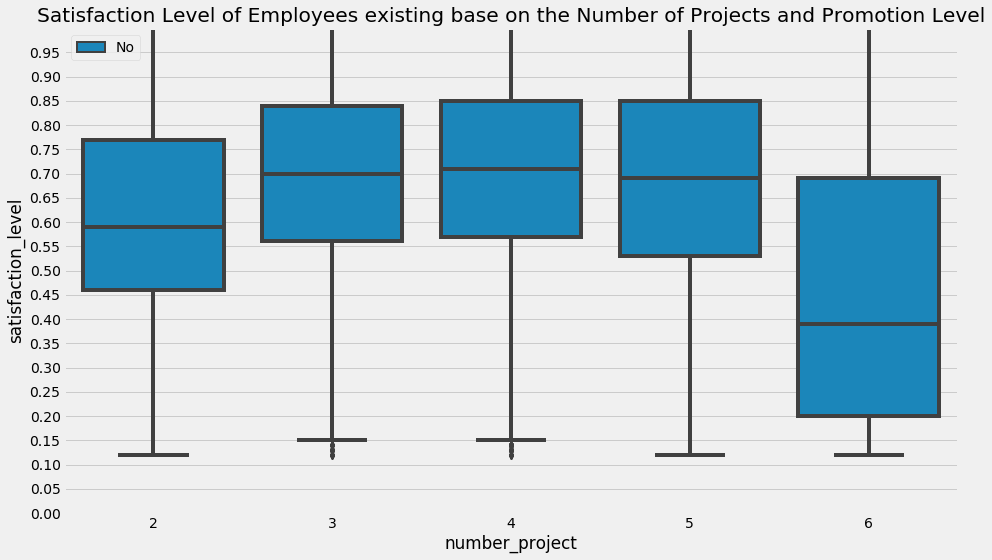

In [62]:
plt.figure(figsize=(14,8))
sns.boxplot(x='number_project',y='satisfaction_level',hue='promotion_last_5years',data=exist)
plt.title("Satisfaction Level of Employees existing base on the Number of Projects and Promotion Level")
plt.tight_layout()
plt.legend(loc=2)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

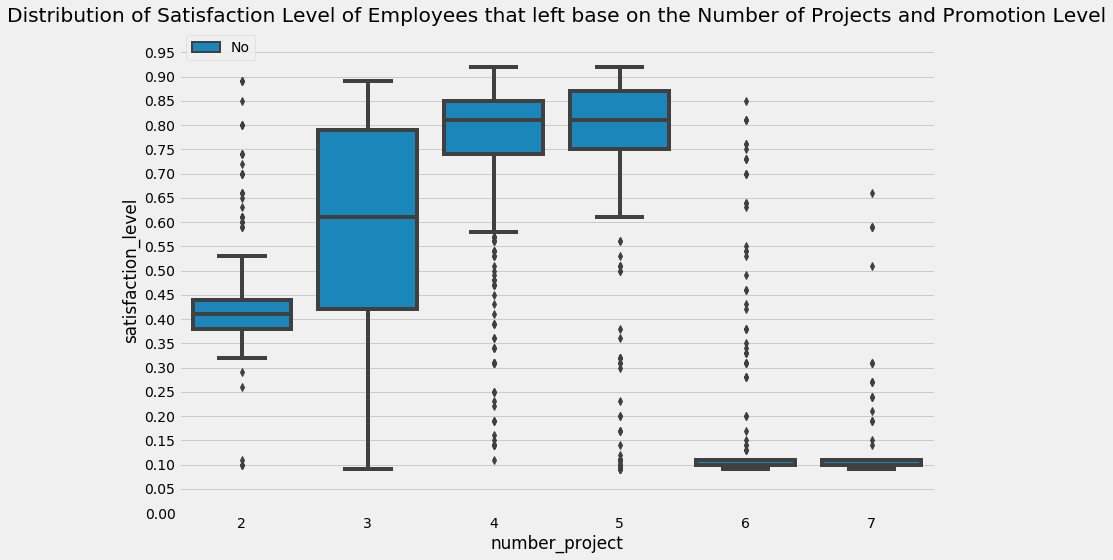

In [63]:
plt.figure(figsize=(14,8))
sns.boxplot(x='number_project',y='satisfaction_level',hue='promotion_last_5years',data=left)
plt.title("Distribution of Satisfaction Level of Employees that left base on the Number of Projects and Promotion Level")
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()
plt.legend(loc=2)

The output shows a good percentage of employees that left had low satisfaction level and large
percentage of them had no promotion in the last 5 years. We then create a cluster from
the database on salary range and analyze

In [20]:
#Employees who have left
low_income= left[left['salary'] =='low']
medium_income = left[left['salary']=='medium']
high_income = left[left['salary']=='high']

#Existing Employees
low_income1= exist[exist['salary'] =='low']
medium_income1 = exist[exist['salary']=='medium']
high_income1 = exist[exist['salary']=='high']

Text(0.5, 0, 'Satisfaction level')

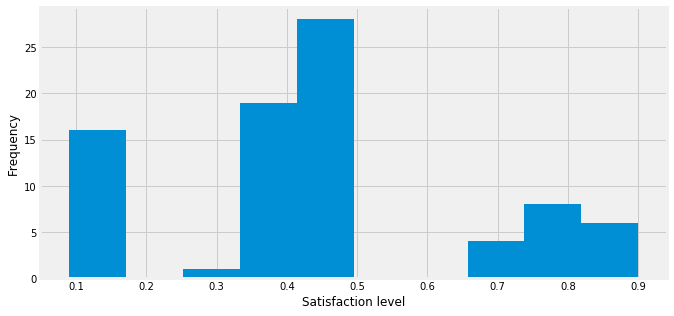

In [21]:
plt.figure(figsize=(10,5))
high_income['satisfaction_level'].plot.hist()
plt.xlabel('Satisfaction level')

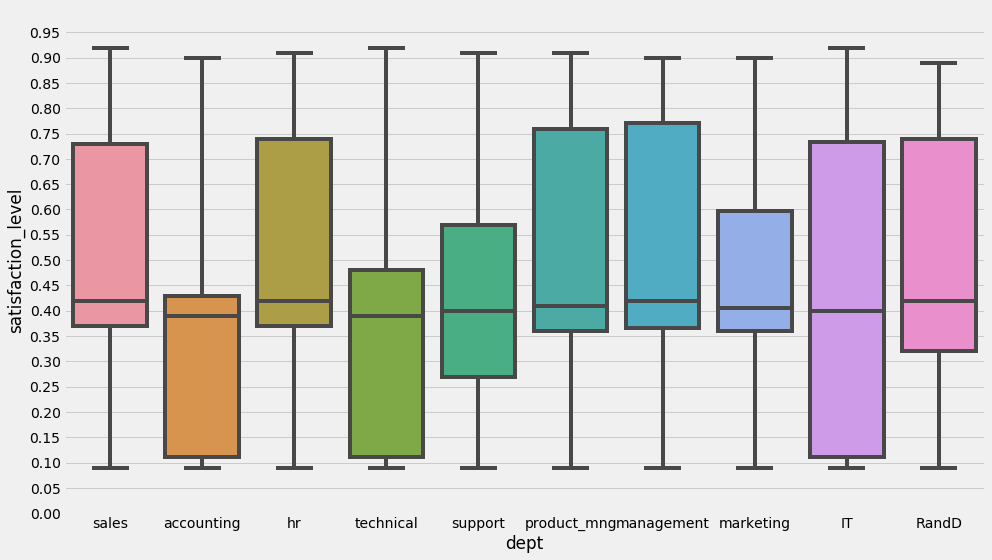

In [67]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='satisfaction_level',data=low_income)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()

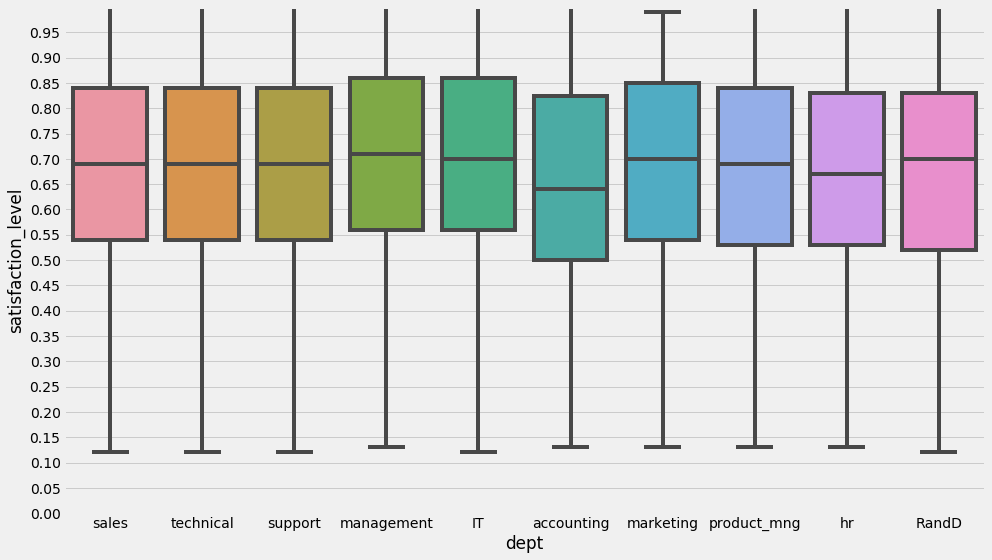

In [68]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='satisfaction_level',data=low_income1)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()

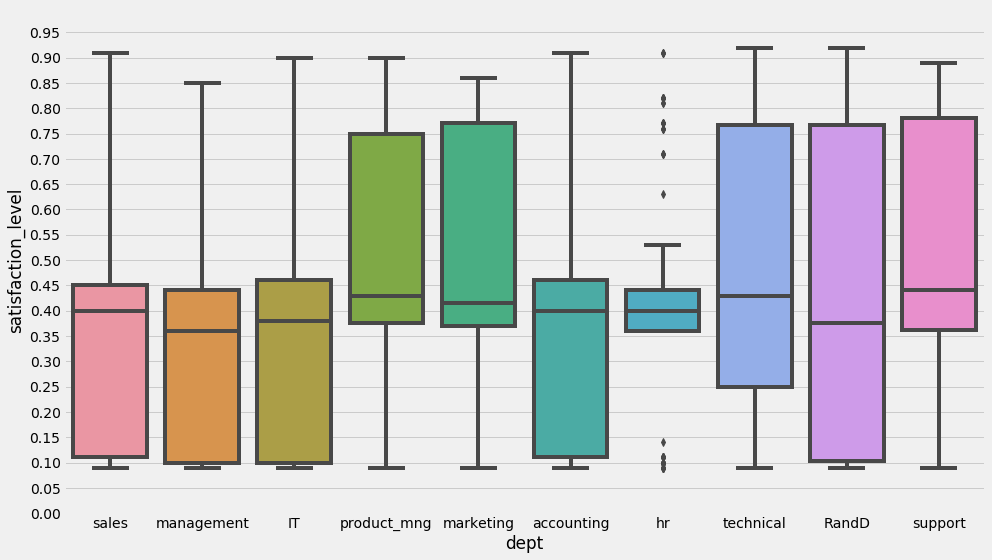

In [69]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='satisfaction_level',data=medium_income)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()

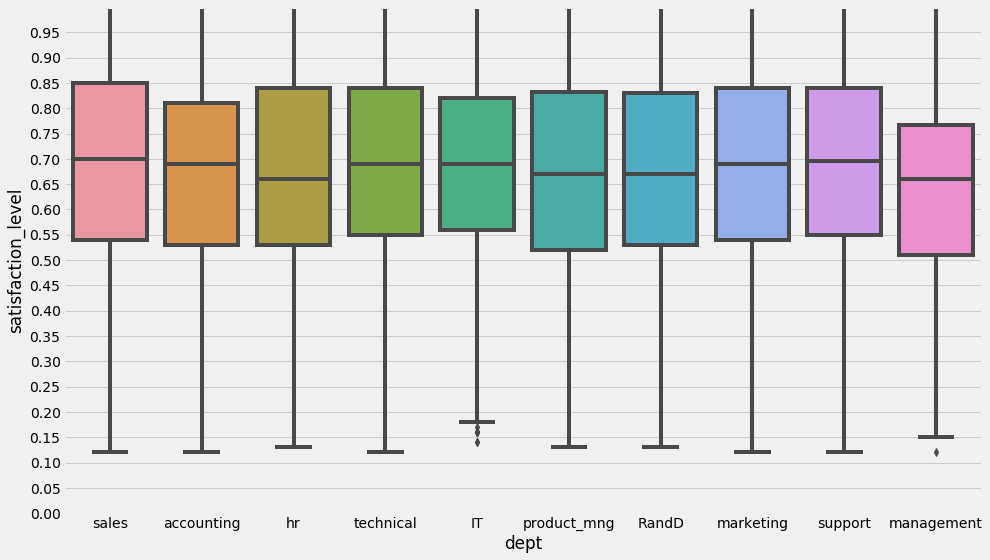

In [70]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='satisfaction_level',data=medium_income1)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()

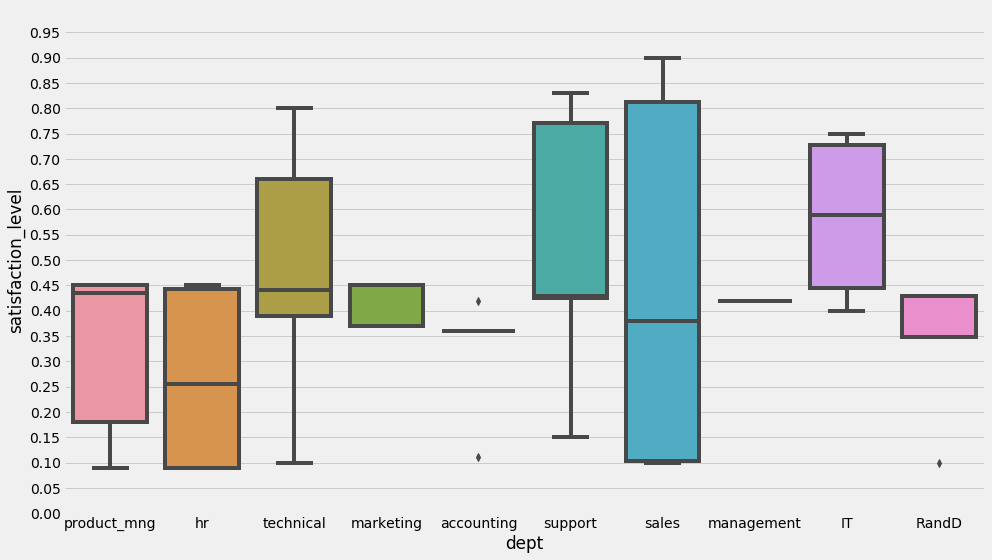

In [71]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='satisfaction_level',data=high_income)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()

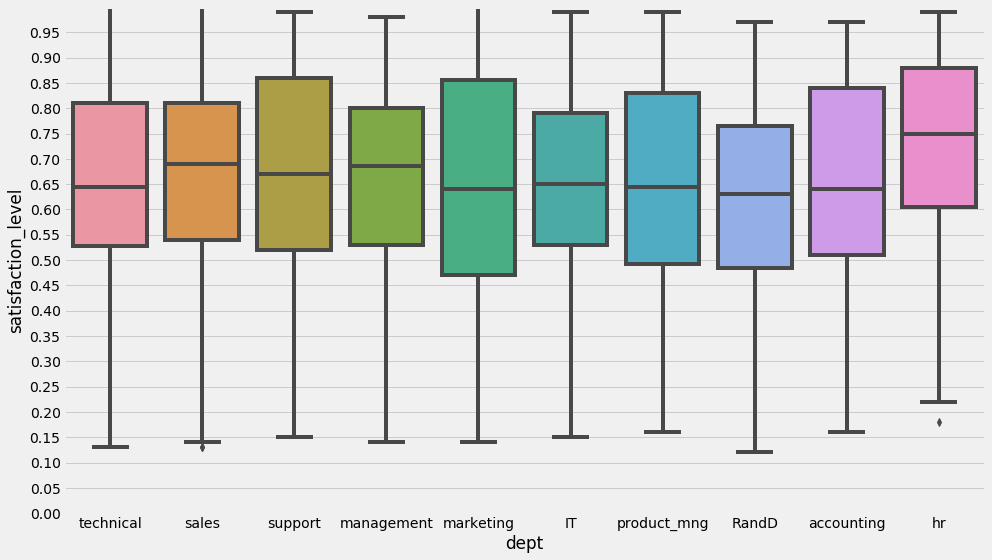

In [72]:
plt.figure(figsize=(14,8))
sns.boxplot(x='dept',y='satisfaction_level',data=high_income1)
plt.ylim([0,1])
plt.yticks(np.arange(0, 1, step=0.05))
plt.tight_layout()

It can be deduced from the output that from the salary ranges for employees who left,
the satisfaction level was less than 45% for the existing employees the satisfaction level
was above 60%. This implies the satisfaction level is a key factor and it explains the type
of employees who left those prone to leave.

we then analyze for satisfaction level based on accident

Text(0.5, 1.0, 'Satisfaction Level of employees who left based on Salary and Work accident')

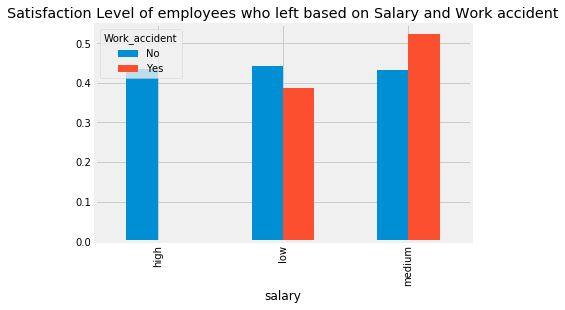

In [15]:
Acci_left =left.pivot_table(index='salary',columns='Work_accident',values='satisfaction_level')
Acci_left.plot.bar()
plt.title("Satisfaction Level of employees who left based on Salary and Work accident")

Text(0.5, 1.0, 'Satisfaction Level of existing employees based on Salary and Work accident')

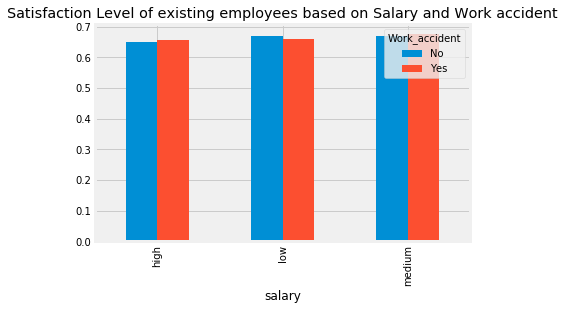

In [16]:
Acci_exist =exist.pivot_table(index='salary',columns='Work_accident',values='satisfaction_level')
Acci_exist.plot.bar()
plt.title("Satisfaction Level of existing employees based on Salary and Work accident")

Text(0, 0.5, 'Satisfaction Level')

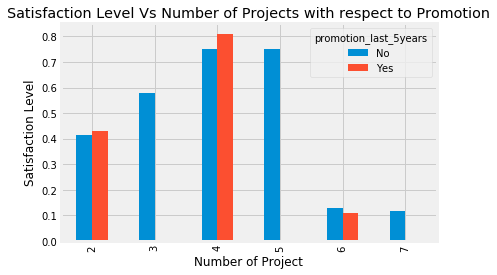

In [17]:
proj_left =left.pivot_table(index='number_project',columns='promotion_last_5years',values='satisfaction_level')
proj_left.plot.bar()
plt.title("Satisfaction Level Vs Number of Projects with respect to Promotion")
plt.xlabel("Number of Project")
plt.ylabel("Satisfaction Level")

Text(0, 0.5, 'Satisfaction Level')

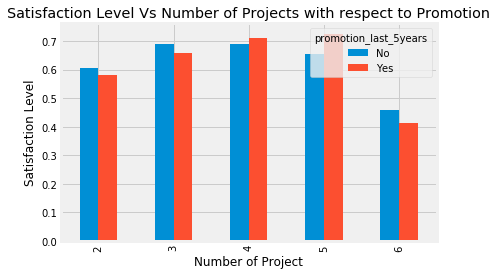

In [18]:
proj_exist =exist.pivot_table(index='number_project',columns='promotion_last_5years',values='satisfaction_level')
proj_exist.plot.bar()
plt.title("Satisfaction Level Vs Number of Projects with respect to Promotion")
plt.xlabel("Number of Project")
plt.ylabel("Satisfaction Level")

CONCLUSION

The following can be gathered from the results displaced above,
    1. When the number of projects taken by the employees who left was greater
    than 4, their satisfaction levl dropped. One way to counter this is to ensure 
    that the number of projects allocated to an employee should not be so much that
    they lose their enthusiasm and motivation to work.
    
    2. The salary structure of employees who left because of work accident was within
    the low and medium range. When analzed it showed the satisaction level as 50%. Comparing
    this with the existing employees showed the salary range distributed into low, medium 
    and high range.